In [1001]:
import pandas as pd
import numpy as np
from Plotter import Plotter
from DataFrameTransform import DataFrameTransform
from DataFrameInfo import DataFrameInfo

df = pd.read_csv('loan_payments3.csv')
graph = Plotter(df)
data = DataFrameInfo()

In [1002]:
#Skew of int64 data
print(f"{df.select_dtypes(include='int64').skew()}")

id                2.389409
member_id         2.221899
loan_amount       0.796752
delinq_2yrs       5.275737
inq_last_6mths    3.279658
open_accounts     1.058490
total_accounts    0.778410
policy_code       0.000000
dtype: float64


In [1003]:
#Skew of float64 data
print(f"{df.select_dtypes(include='float64').skew()}")

funded_amount                  0.863213
funded_amount_inv              0.805913
term_months                    1.130346
int_rate                       0.437667
instalment                     0.988612
annual_inc                     8.790983
dti                            0.194341
out_prncp                      2.355036
out_prncp_inv                  2.355477
total_payment                  1.258564
total_payment_inv              1.247248
total_rec_prncp                1.249434
total_rec_int                  2.193305
total_rec_late_fee            13.263454
recoveries                    13.895854
collection_recovery_fee       27.668216
last_payment_amount            2.475530
collections_12_mths_ex_med    20.424254
dtype: float64


In [1004]:
def overview(column):
    print(df[column].describe())
    print(f"Skew of {column} is {df[column].skew()}")
    graph.histogram(column, 50)
    graph.boxplot(column)

count    51986.000000
mean     13437.189820
std       8097.087132
min        500.000000
25%       7200.000000
50%      12000.000000
75%      18250.000000
max      35000.000000
Name: loan_amount, dtype: float64
Skew of loan_amount is 0.7967522102620134


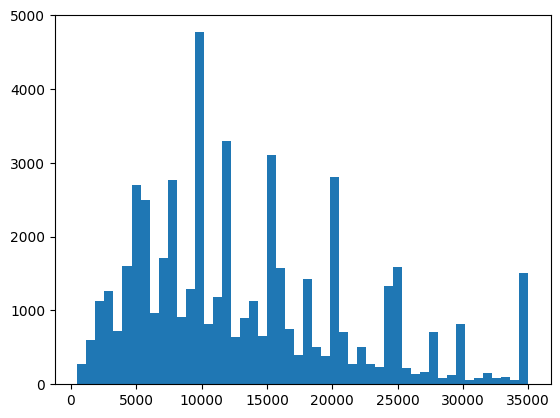

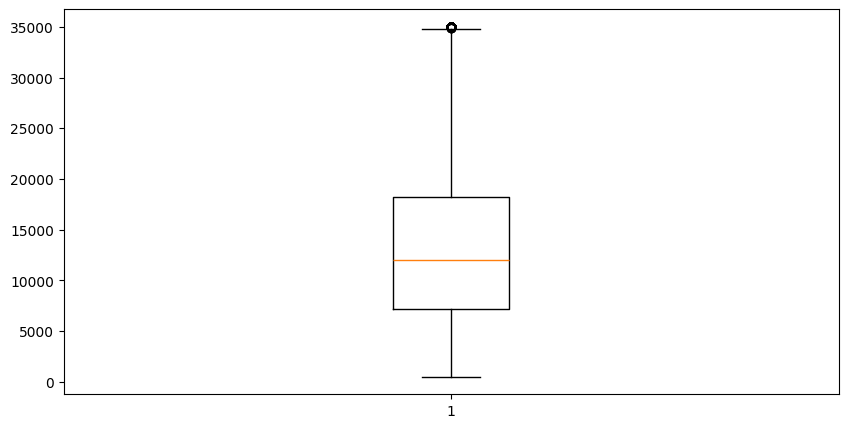

In [1005]:
overview('loan_amount')

count    5.198600e+04
mean     7.315921e+04
std      5.201939e+04
min      3.300000e+03
25%      4.500000e+04
50%      6.200400e+04
75%      8.750000e+04
max      2.039784e+06
Name: annual_inc, dtype: float64
Skew of annual_inc is 8.790983245220485


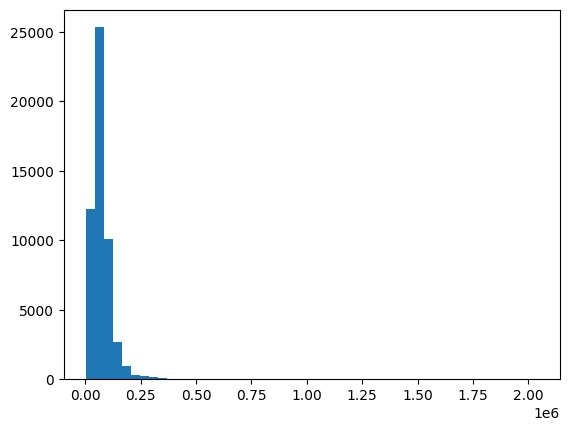

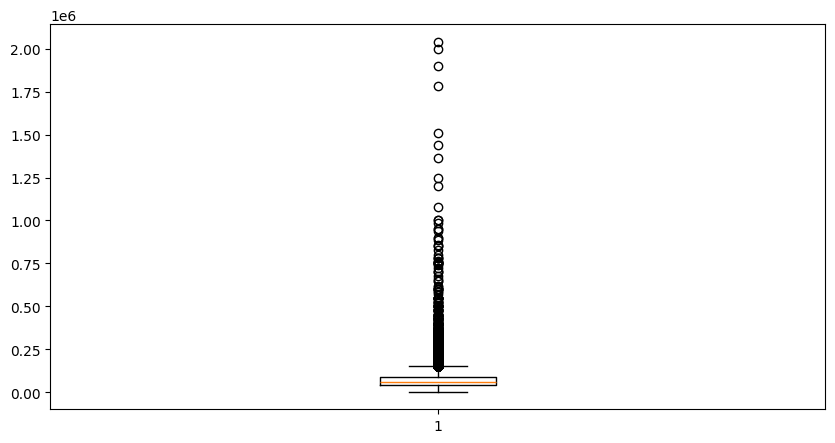

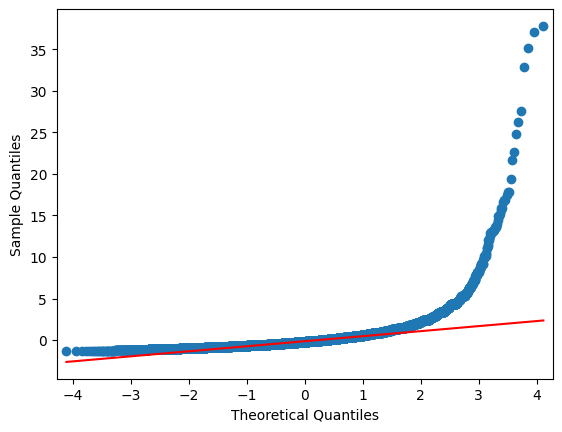

In [1006]:
# Exploring annual_inc as skew is 8.7.
# I wanted to see if the data in this column is skewed due to a couple or several outliers. I have used a histogram and a qqlot to visualise this.

overview('annual_inc')
graph.qqplot('annual_inc')

count    51986.000000
mean         2.401694
std          0.047259
min          2.092071
25%          2.371590
50%          2.401068
75%          2.431804
max          2.676102
Name: annual_inc, dtype: float64
The new skewness for the annual_inc column is -0.024391799751583433


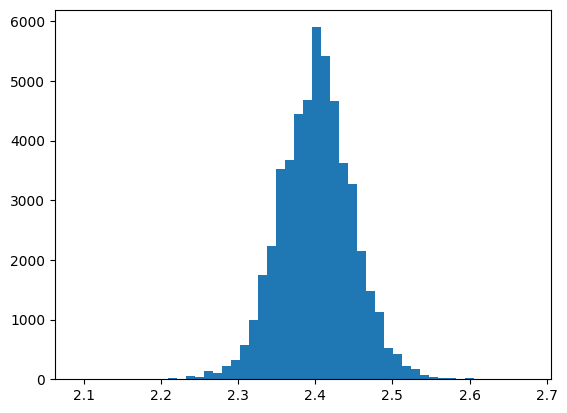

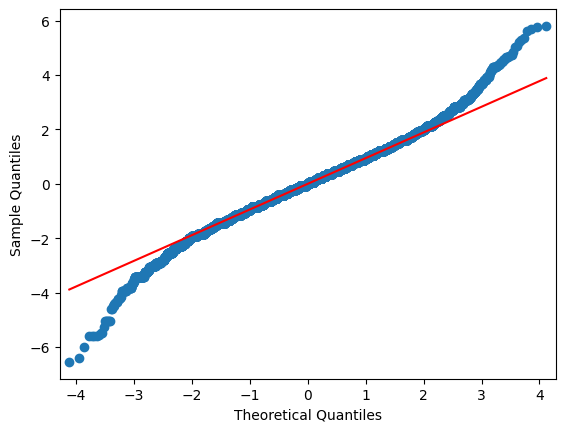

<class 'pandas.core.series.Series'>


In [1037]:
# As some of the data is skewed above the value of 1, I have decided to use a log transformation to reduce the amount of skew.
# I have replotted the new data on a histogram to see the changes and the new column is been imputed in a new dataframe.
# These stages will be repeated below as I continue to reduce the amount of skew across the data set.

new_column = DataFrameTransform(df)
new_df = df
new_annual_inc = new_column.logtransform('annual_inc')
new_df['annual_inc'] = new_annual_inc

print(new_df['annual_inc'].describe())
print(f'The new skewness for the annual_inc column is {new_annual_inc.skew()}')

new_graph = Plotter(new_df)
new_graph.histogram('annual_inc', 50)
new_graph.qqplot('annual_inc')

count    51986.000000
mean         0.243008
std          0.706380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: delinq_2yrs, dtype: float64
Skew of delinq_2yrs is 5.275736985639616


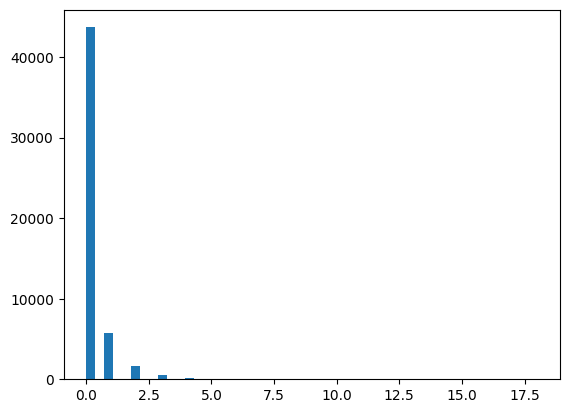

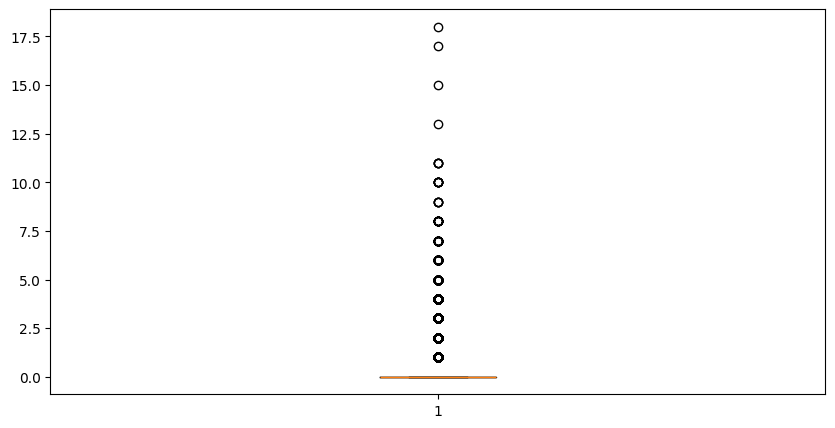

delinq_2yrs
0     43694
1      5744
2      1631
3       510
4       205
5        90
6        52
7        26
8        15
10        7
9         4
11        4
17        1
15        1
13        1
18        1
Name: count, dtype: int64

In [1008]:
print(new_df['delinq_2yrs'].describe())
print(f"Skew of delinq_2yrs is {new_df['delinq_2yrs'].skew()}")
new_graph.histogram('delinq_2yrs', 50)
graph.boxplot('delinq_2yrs')
data.distinct_values(df['delinq_2yrs'])

The delinq_2yrs column represents the number of 30+ days past-due payments in the borrower's credit file for the past 2 years. As clearly shown in the description of the data above, at least 75% of the customers (84%) do not have any days that are past-due payments in their credit file. Therefore, naturally, there will be a high amount of skew/anomalous data points.

count    51986.000000
mean         0.895318
std          1.262387
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: inq_last_6mths, dtype: float64
Skew of inq_last_6mths is 3.279658380360404


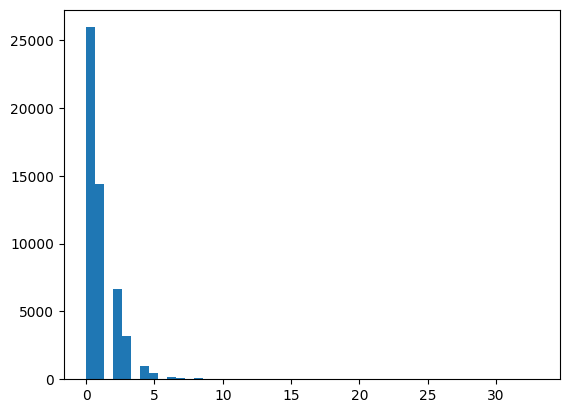

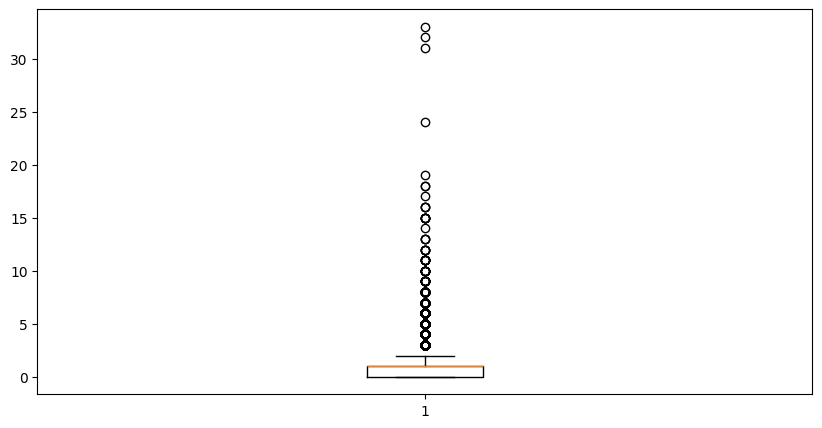

inq_last_6mths
0     25937
1     14390
2      6630
3      3163
4       999
5       444
6       200
7        96
8        64
9        17
10       11
11        9
15        6
12        5
13        3
16        3
18        2
17        1
33        1
24        1
31        1
32        1
19        1
14        1
Name: count, dtype: int64

In [1009]:
overview('inq_last_6mths')
data.distinct_values(df['inq_last_6mths'])

It is clear from the boxplots and the description of this column that there are some high anomalous points of data that are causing the skew value to be above 1. Below, I have removed all rows where the inq_last_6mths >10 as this will drop <1% of the data and should have an impact on the skew value.

count    51951.000000
mean         0.885488
std          1.195144
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: inq_last_6mths, dtype: float64
The new skewness for the inq_last_6mths column is 1.9323988642403955


<function matplotlib.pyplot.show(close=None, block=None)>

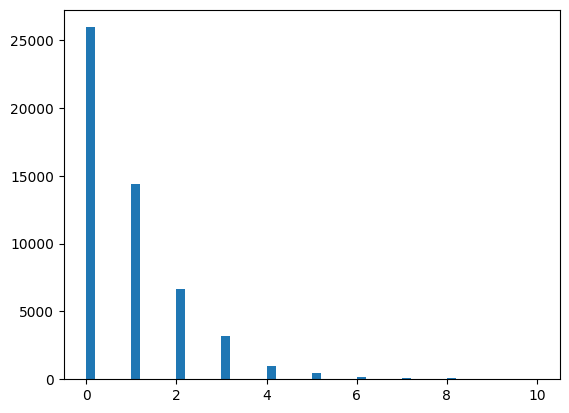

In [1010]:
new_df = new_df.drop(new_df[new_df.inq_last_6mths > 10].index)
print(new_df['inq_last_6mths'].describe())
print(f'The new skewness for the inq_last_6mths column is {new_df['inq_last_6mths'].skew()}')

data.distinct_values(new_df['inq_last_6mths'])
new_graph = Plotter(new_df)
new_graph.histogram('inq_last_6mths', 50)


count    51986.000000
mean        10.600239
std          4.806996
min          1.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         53.000000
Name: open_accounts, dtype: float64
Skew of open_accounts is 1.0584895304090367


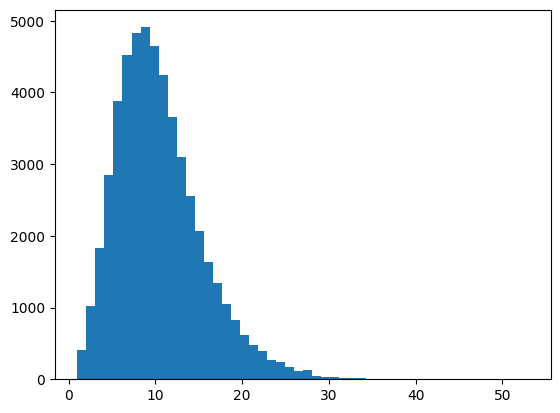

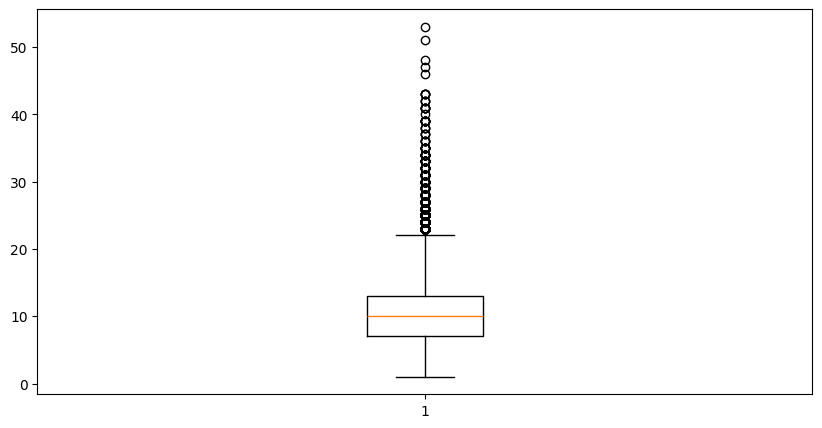

In [1011]:
overview('open_accounts')

count    51986.000000
mean        24.219905
std         11.581834
min          1.000000
25%         16.000000
50%         23.000000
75%         31.000000
max        108.000000
Name: total_accounts, dtype: float64
Skew of total_accounts is 0.7784102207448695


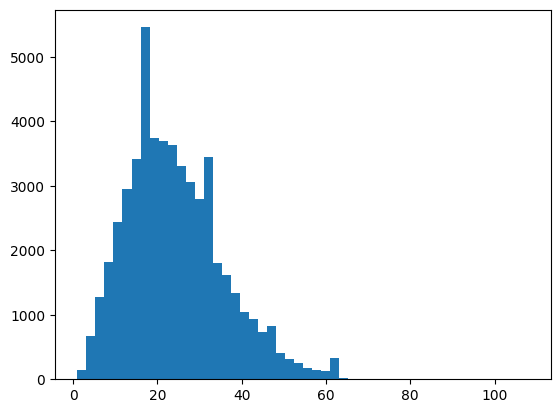

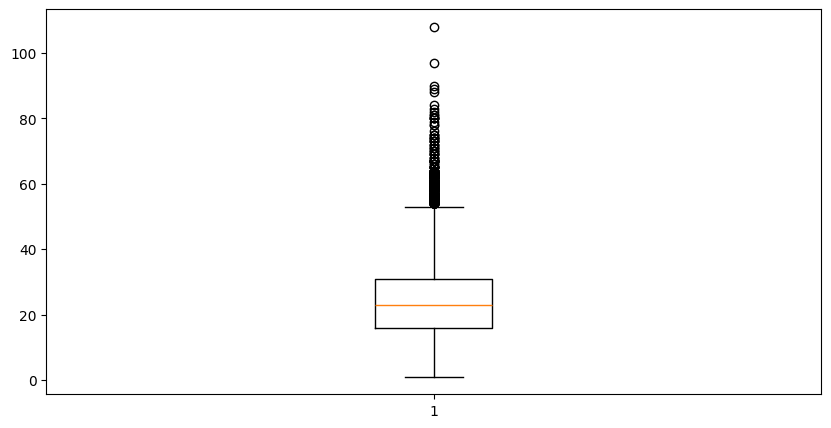

In [1012]:
overview('total_accounts')

count    51986.000000
mean     13257.943966
std       7813.437066
min        500.000000
25%       7500.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: funded_amount, dtype: float64
Skew of funded_amount is 0.8632129078795535


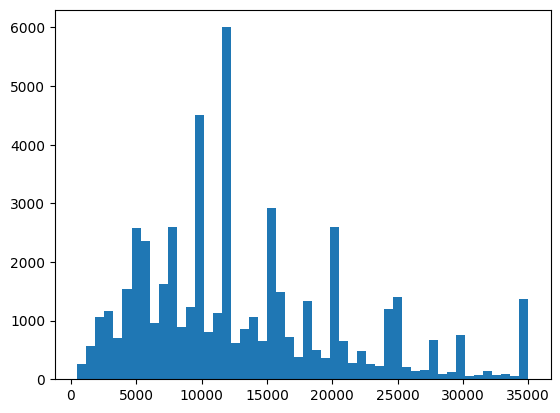

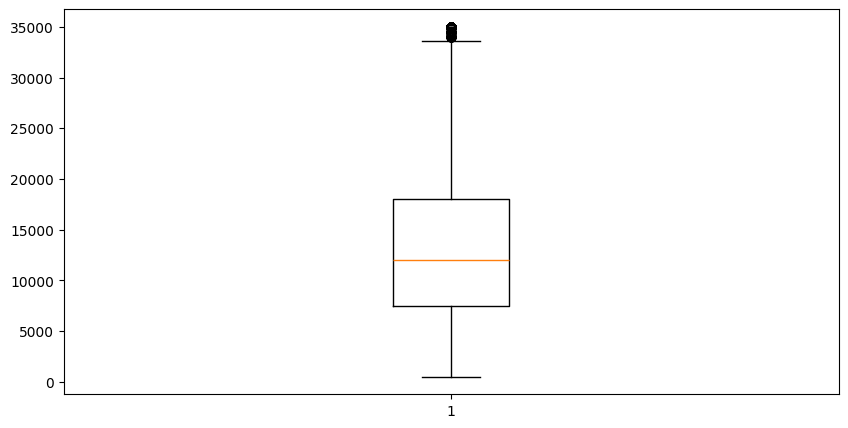

In [1013]:
overview('funded_amount')

count    51986.000000
mean     13050.272384
std       8115.767225
min          0.000000
25%       6950.000000
50%      11500.000000
75%      18000.000000
max      35000.000000
Name: funded_amount_inv, dtype: float64
Skew of funded_amount_inv is 0.8059126616447944


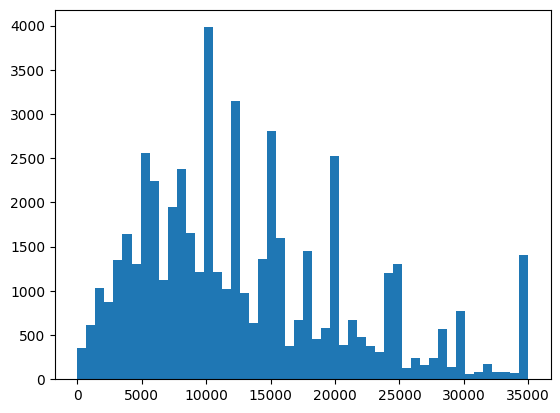

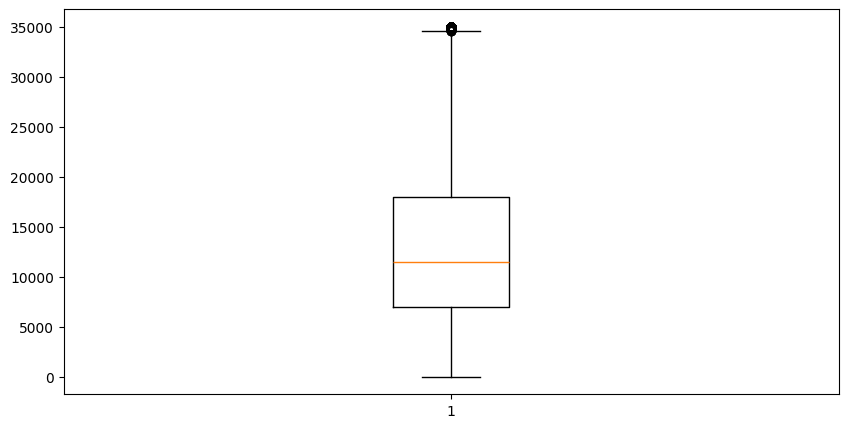

In [1014]:
overview('funded_amount_inv')

count    51986.000000
mean        42.095795
std         10.447127
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term_months, dtype: float64
Skew of term_months is 1.1303456194224222


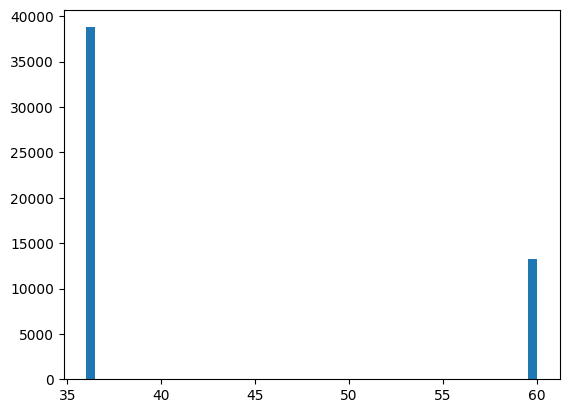

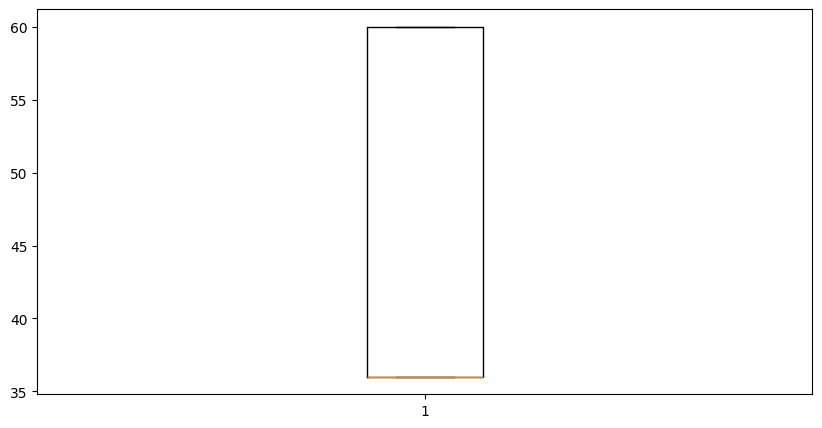

term_months
36.0    38782
60.0    13204
Name: count, dtype: int64

In [1015]:
overview('term_months')
data.distinct_values(df['term_months'])

count    51986.000000
mean        13.516927
std          4.176762
min          5.420000
25%         10.650000
50%         13.516927
75%         15.880000
max         26.060000
Name: int_rate, dtype: float64
Skew of int_rate is 0.43766730090145856


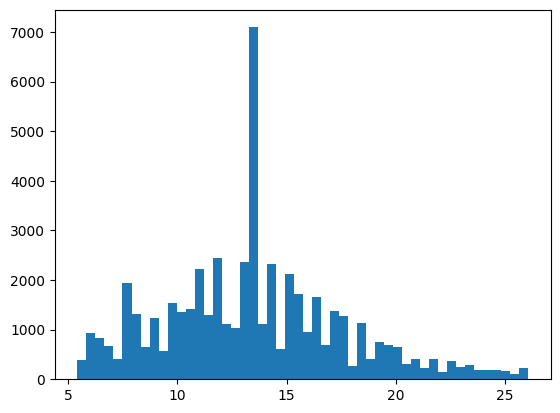

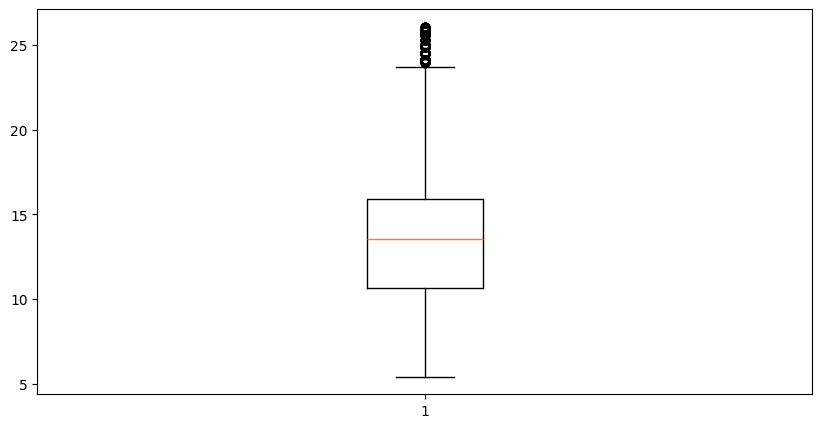

In [1016]:
overview('int_rate')

count    51986.000000
mean       402.808056
std        239.338026
min         15.670000
25%        227.980000
50%        349.650000
75%        530.660000
max       1407.010000
Name: instalment, dtype: float64
Skew of instalment is 0.988611568515015


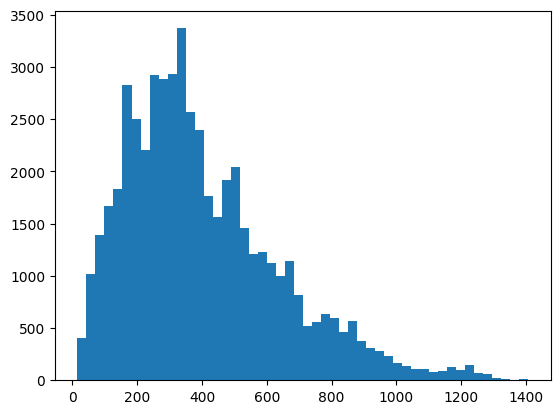

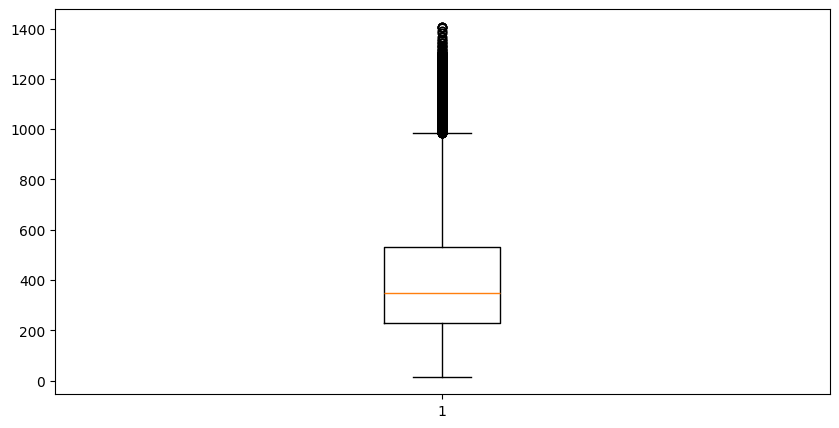

In [1017]:
overview('instalment')

count    51986.000000
mean        15.828803
std          7.597879
min          0.000000
25%         10.190000
50%         15.550000
75%         21.200000
max         39.910000
Name: dti, dtype: float64
Skew of dti is 0.19434139791659438


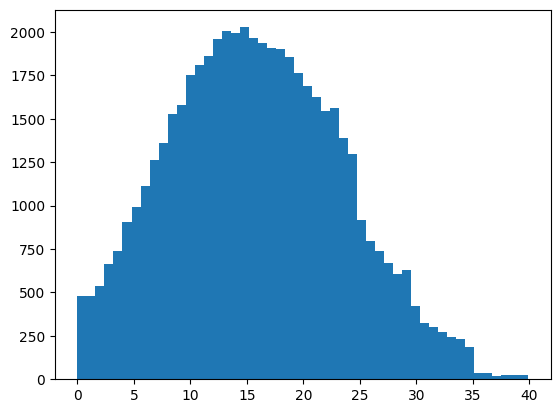

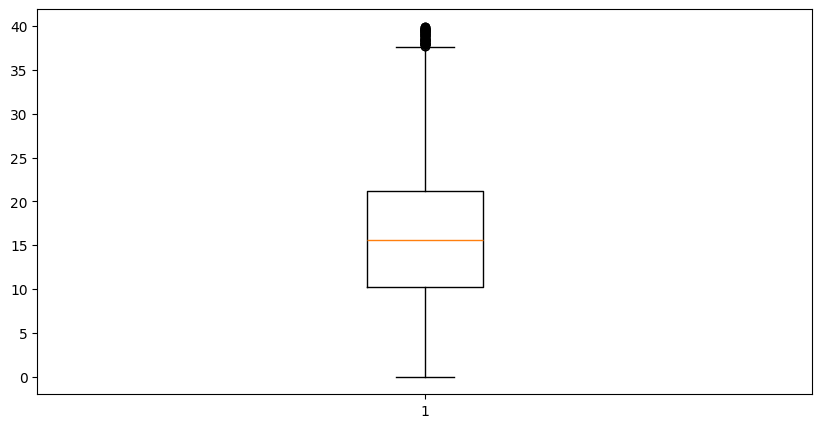

In [1018]:
overview('dti')

count    51986.000000
mean      2758.224551
std       5183.095053
min          0.000000
25%          0.000000
50%          0.000000
75%       3384.075000
max      32399.940000
Name: out_prncp, dtype: float64
Skew of the outstanding principle column is 2.3550355918906547


<function matplotlib.pyplot.show(close=None, block=None)>

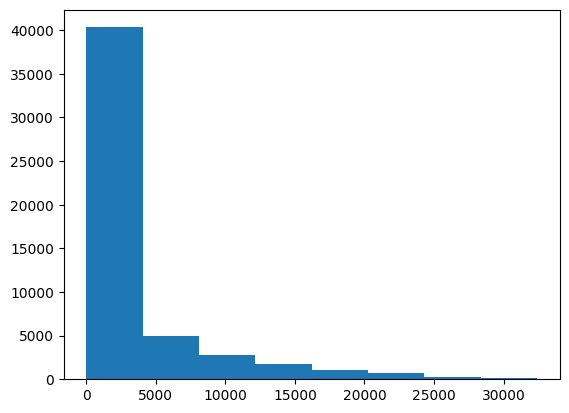

In [1019]:
print(df['out_prncp'].describe())
print(f"Skew of the outstanding principle column is {df['out_prncp'].skew()}")
graph.histogram('out_prncp', 8)


count    51951.000000
mean         3.163881
std          4.166858
min         -0.798508
25%          0.000000
50%          0.000000
75%          8.128429
max         10.385912
Name: out_prncp, dtype: float64
The new skewness for the outstanding principle column is 0.593801443708851


<function matplotlib.pyplot.show(close=None, block=None)>

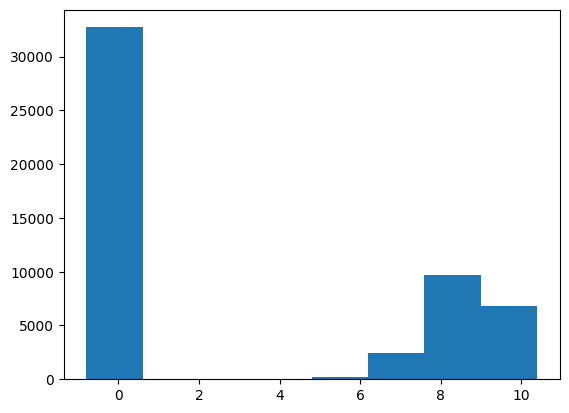

In [1020]:
new_out_prncp = new_column.logtransform('out_prncp')
new_df['out_prncp'] = new_out_prncp

print(new_df['out_prncp'].describe())
print(f'The new skewness for the outstanding principle column is {new_out_prncp.skew()}')

new_graph.histogram('out_prncp', 8)


count    51986.000000
mean      2756.806811
std       5181.240436
min          0.000000
25%          0.000000
50%          0.000000
75%       3382.550000
max      32399.940000
Name: out_prncp_inv, dtype: float64
Skew of out_prncp_inv is 2.355477297996017


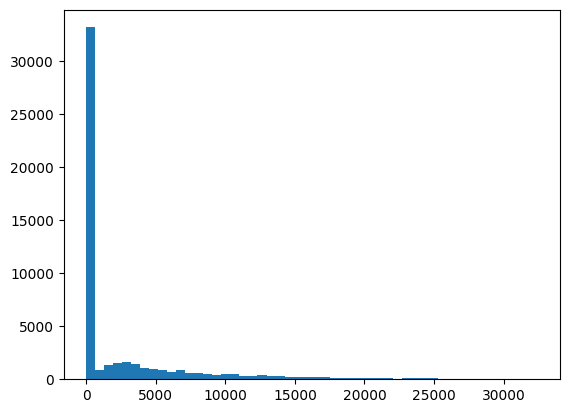

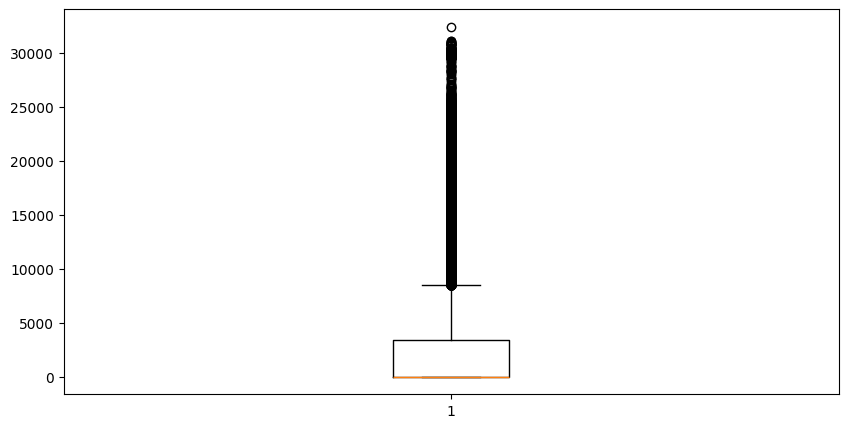

In [1021]:
overview('out_prncp_inv')

count    51986.000000
mean     12209.912418
std       8415.565113
min         33.730000
25%       6005.567500
50%      10247.575000
75%      16420.205000
max      55758.222084
Name: total_payment, dtype: float64
Skew of total_payment is 1.2585641098705336


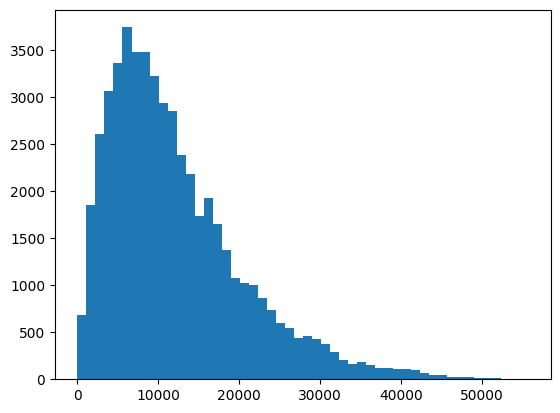

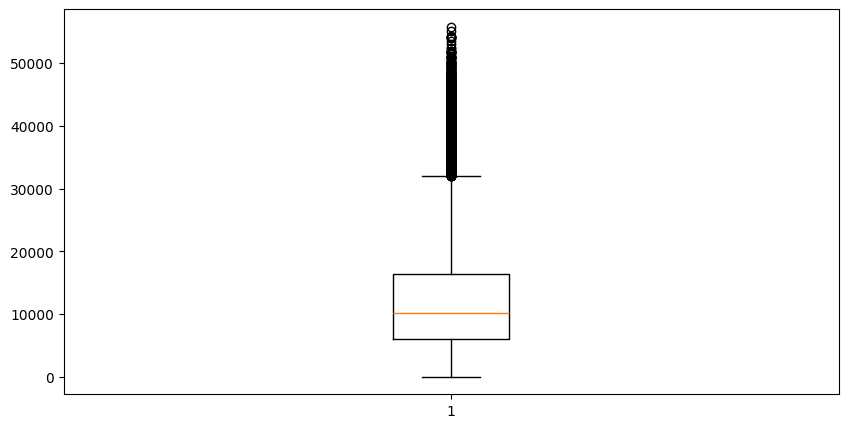

In [1022]:
overview('total_payment')

count    51986.000000
mean     11914.496095
std       8388.335085
min          0.000000
25%       5758.250000
50%       9964.390000
75%      16123.640000
max      55061.000000
Name: total_payment_inv, dtype: float64
Skew of total_payment_inv is 1.2472481361600392


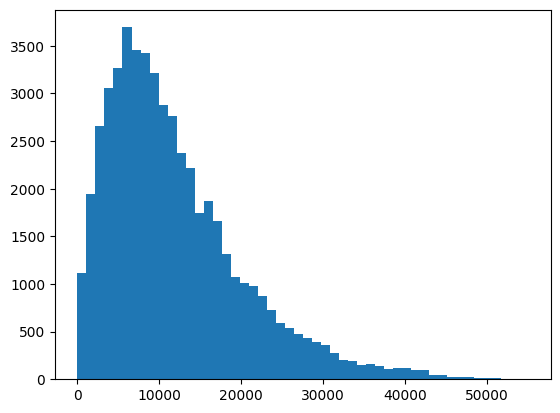

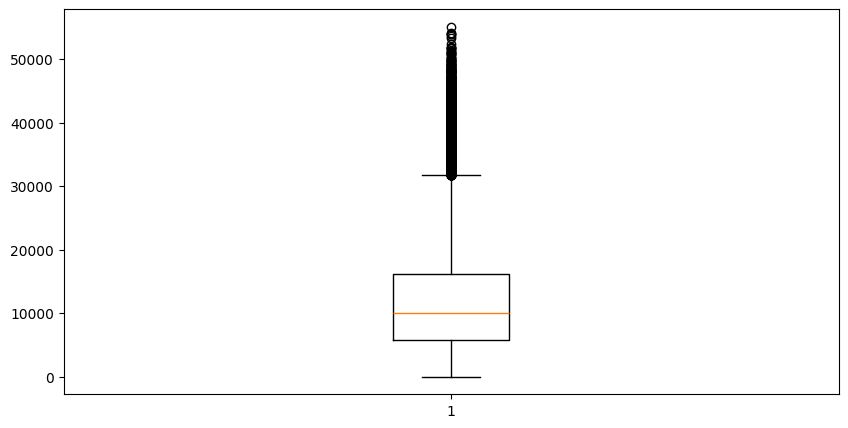

In [1023]:
overview('total_payment_inv')

count    51986.000000
mean      9511.387526
std       6981.952993
min          0.000000
25%       4365.965000
50%       7800.250000
75%      12800.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64
Skew of total_rec_prncp is 1.249433930830655


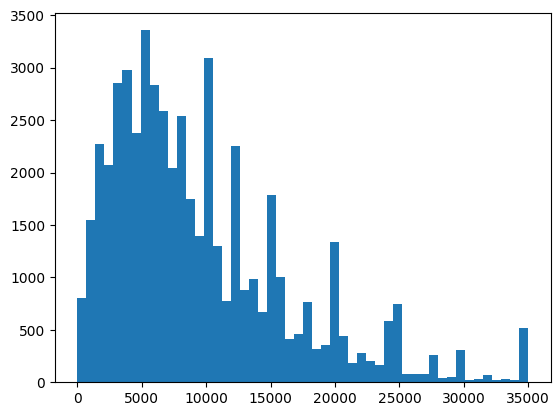

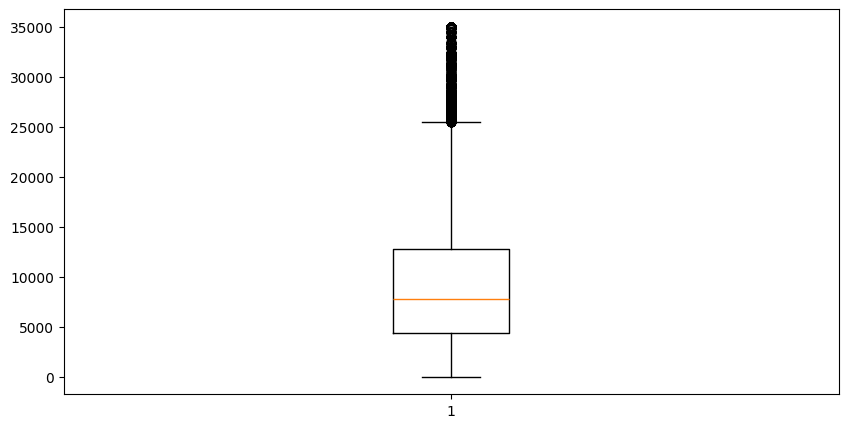

In [1024]:
overview('total_rec_prncp')

count    51986.000000
mean      2604.647596
std       2597.735164
min          6.220000
25%        901.380000
50%       1755.385000
75%       3357.060000
max      23062.450000
Name: total_rec_int, dtype: float64
Skew of total_rec_int is 2.1933050917560335


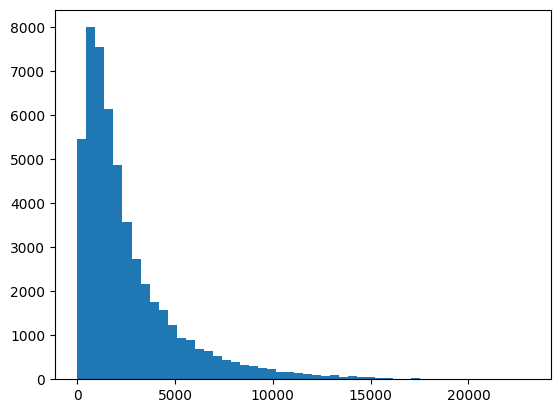

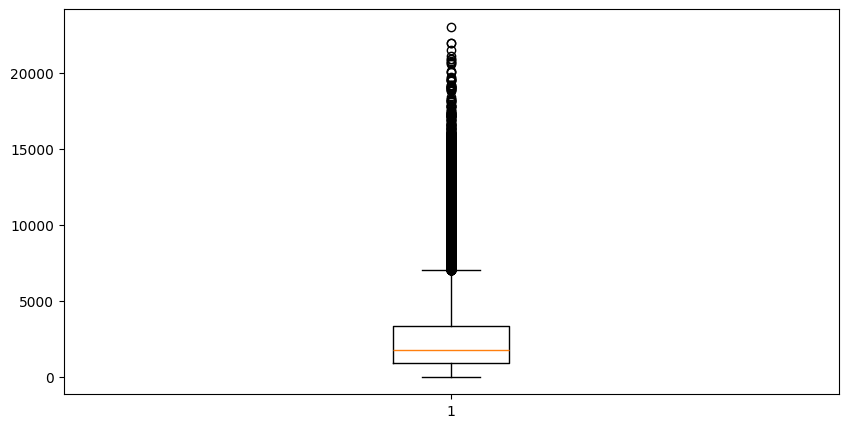

In [1025]:
overview('total_rec_int')

count    51986.000000
mean         0.907643
std          6.236588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        358.680000
Name: total_rec_late_fee, dtype: float64
Skew of total_rec_late_fee is 13.263454432820854


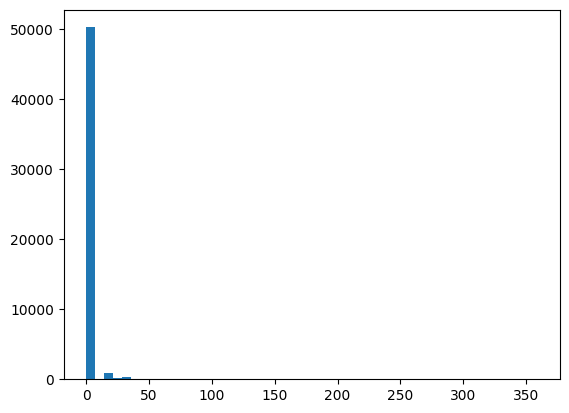

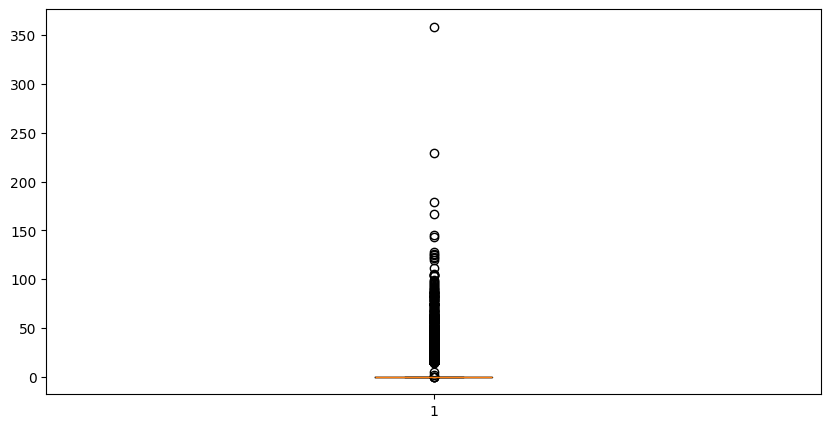

In [1026]:
overview('total_rec_late_fee')

count    51791.000000
mean         0.670048
std          4.185586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.980000
Name: total_rec_late_fee, dtype: float64
The new skewness for the total_rec_late_fee column is 7.17115912546142


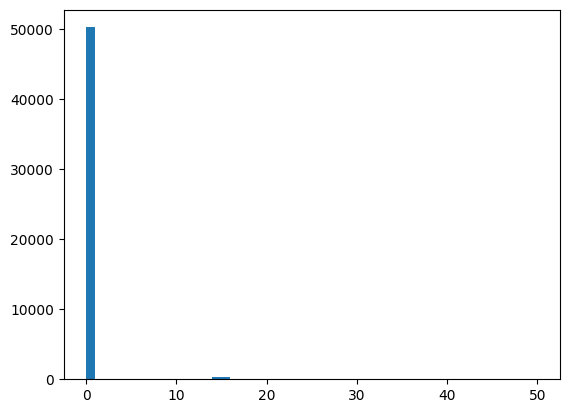

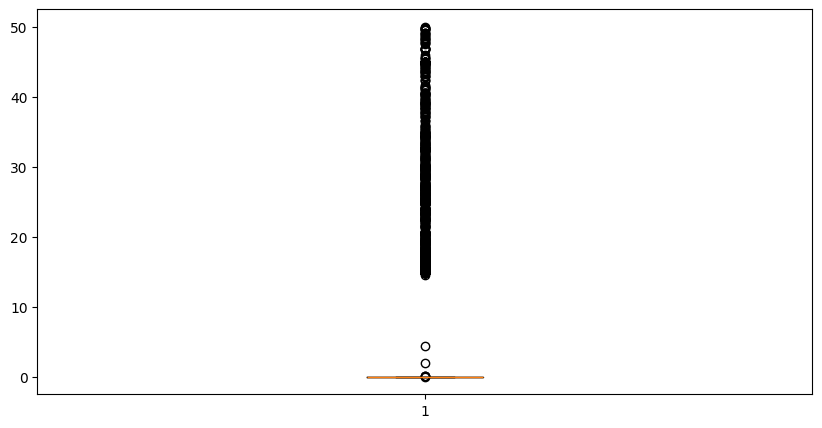

In [1027]:
new_df = new_df.drop(new_df[new_df.total_rec_late_fee > 50].index)
print(new_df['total_rec_late_fee'].describe())
print(f'The new skewness for the total_rec_late_fee column is {new_df['total_rec_late_fee'].skew()}')

data.distinct_values(new_df['total_rec_late_fee'])
new_graph = Plotter(new_df)
new_graph.histogram('total_rec_late_fee', 50)
new_graph.boxplot('total_rec_late_fee')

count    51986.000000
mean        92.969665
std        621.455772
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      27750.000000
Name: recoveries, dtype: float64
Skew of recoveries is 13.895854475829282


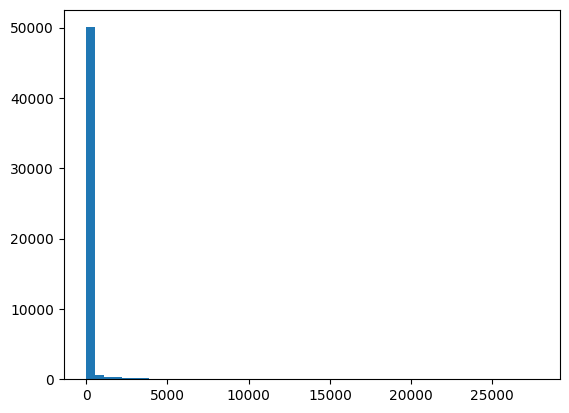

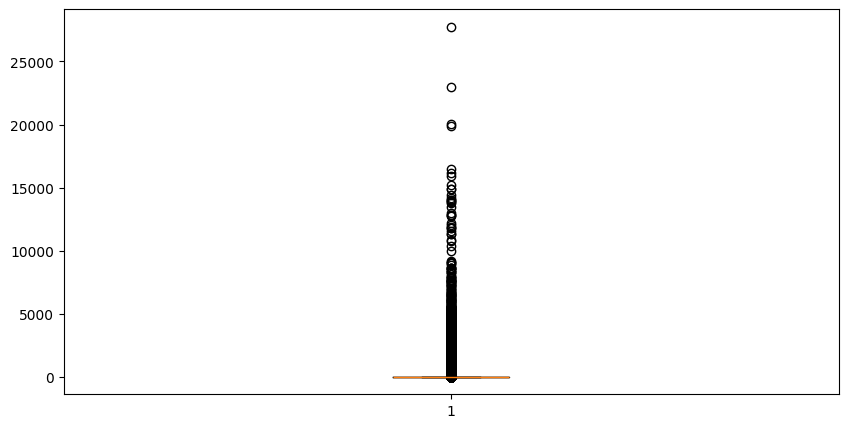

In [1028]:
overview('recoveries')

count    51705.000000
mean        74.008919
std        424.966202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5995.720000
Name: recoveries, dtype: float64
The new skewness for the recoveries column is 7.672800558286398


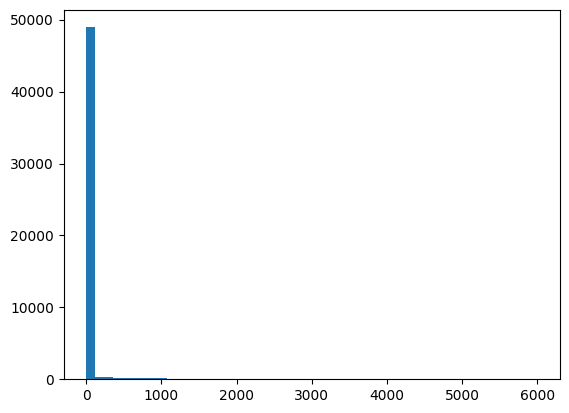

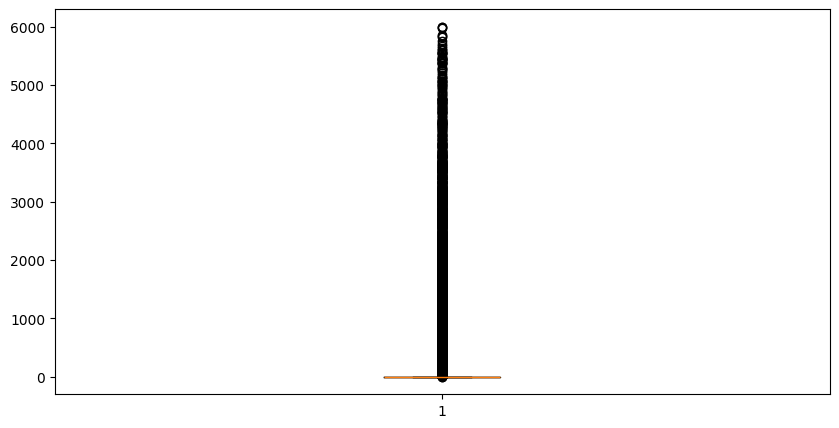

In [1029]:
new_df = new_df.drop(new_df[new_df.recoveries > 6000].index)
print(new_df['recoveries'].describe())
print(f'The new skewness for the recoveries column is {new_df['recoveries'].skew()}')

data.distinct_values(new_df['recoveries'])
new_graph = Plotter(new_df)
new_graph.histogram('recoveries', 50)
new_graph.boxplot('recoveries')

count    51986.000000
mean        10.872931
std        120.594521
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64
Skew of collection_recovery_fee is 27.66821608641425


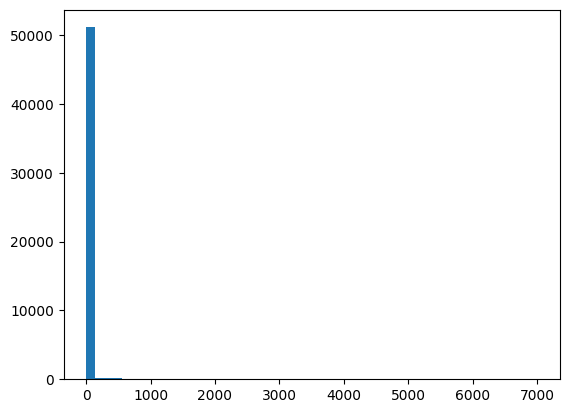

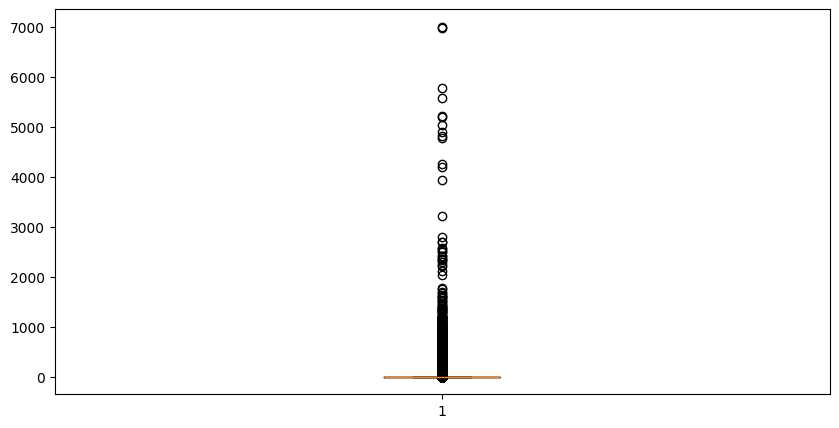

In [1030]:
overview('collection_recovery_fee')


In [1031]:
# Calculate the Z-Scores
mean_crf = np.mean(df['collection_recovery_fee'])
std_crf = np.std(df['collection_recovery_fee'])
z_scores_crf = (df['collection_recovery_fee'] - mean_crf) / std_crf
crf_z = df['collection_recovery_fee']

# Add th z-scores to the dataframe as a new column:
crf_z['z_scores'] = z_scores_crf

print(crf_z)

0                                                         0.0
1                                                         0.0
2                                                         0.0
3                                                         0.0
4                                                         0.0
                                  ...                        
51982                                                     0.0
51983                                                     0.0
51984                                                     0.0
51985                                                     0.0
z_scores    0       -0.090162
1       -0.090162
2       -0...
Name: collection_recovery_fee, Length: 51987, dtype: object


C:\Users\harde\AppData\Local\Temp\ipykernel_14008\3468862296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crf_z['z_scores'] = z_scores_crf


count    51705.000000
mean         7.249321
std         61.415250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1668.290000
Name: collection_recovery_fee, dtype: float64
The new skewness for the collection_recovery_fee column is 11.70858429177954


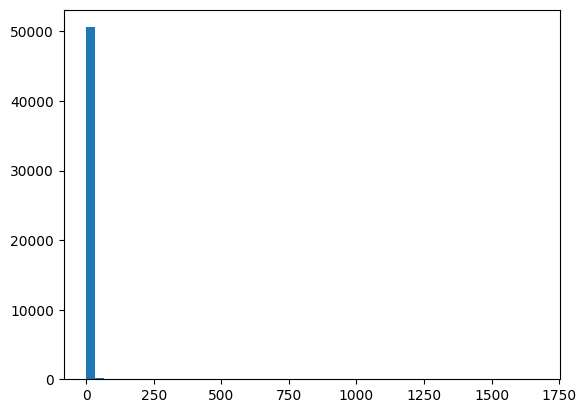

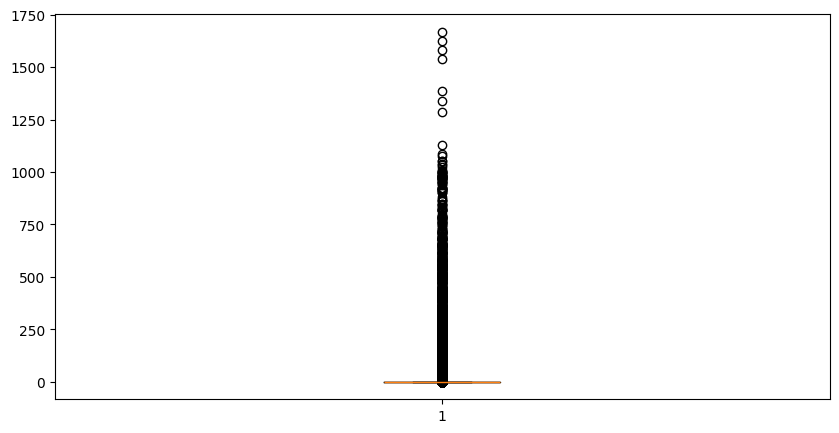

In [1032]:
new_df = new_df.drop(new_df[new_df.collection_recovery_fee > 2000].index)
print(new_df['collection_recovery_fee'].describe())
print(f'The new skewness for the collection_recovery_fee column is {new_df['collection_recovery_fee'].skew()}')

data.distinct_values(new_df['collection_recovery_fee'])
new_graph = Plotter(new_df)
new_graph.histogram('collection_recovery_fee', 50)
new_graph.boxplot('collection_recovery_fee')

count    51986.000000
mean      3178.578675
std       5366.805954
min          0.000000
25%        294.115000
50%        572.560000
75%       3855.242500
max      36115.200000
Name: last_payment_amount, dtype: float64
Skew of last_payment_amount is 2.4755295228895147


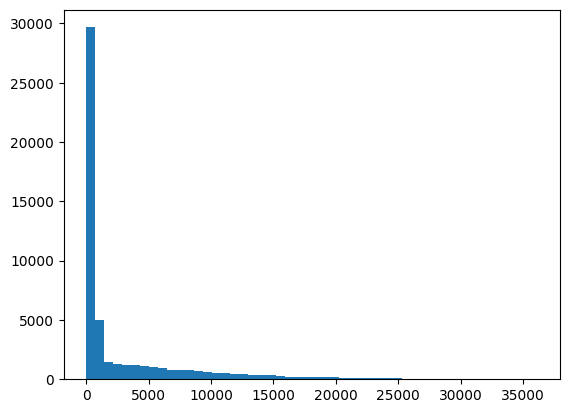

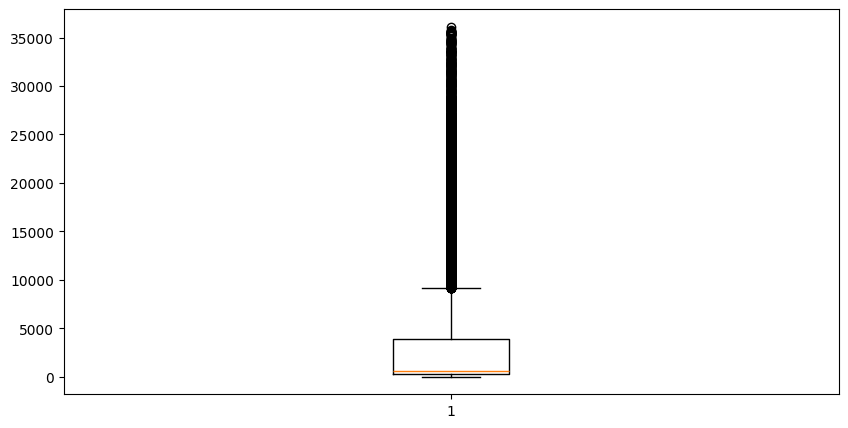

In [1033]:
overview('last_payment_amount')

count    51986.000000
mean         0.004174
std          0.070734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: collections_12_mths_ex_med, dtype: float64
Skew of collections_12_mths_ex_med is 20.42425379029409


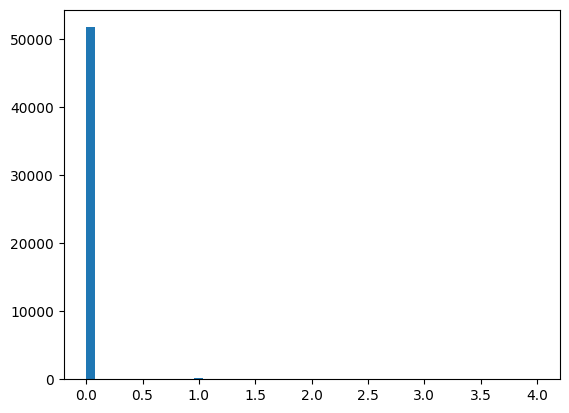

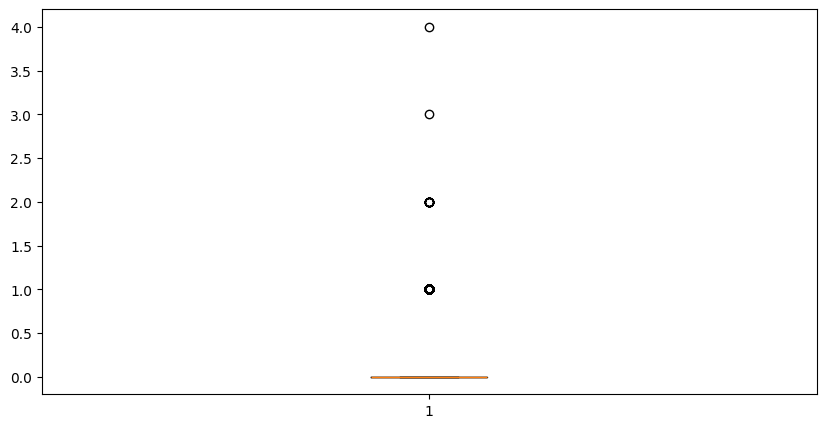

In [1034]:
overview('collections_12_mths_ex_med')

In [1035]:
print(f"{new_df.select_dtypes(include='float64').skew()}")

funded_amount                  0.866445
funded_amount_inv              0.809779
term_months                    1.131710
int_rate                       0.437680
instalment                     0.989785
annual_inc                     0.196232
dti                            0.194765
out_prncp                      0.588331
out_prncp_inv                  2.352101
total_payment                  1.262468
total_payment_inv              1.250980
total_rec_prncp                1.250052
total_rec_int                  2.195366
total_rec_late_fee             7.192592
recoveries                     7.672801
collection_recovery_fee       11.708584
last_payment_amount            2.469355
collections_12_mths_ex_med    20.368602
dtype: float64


In [1036]:
print(f"{new_df.select_dtypes(include='int64').skew()}")

id                2.385140
member_id         2.218154
loan_amount       0.800770
delinq_2yrs       5.279642
inq_last_6mths    1.917439
open_accounts     1.058072
total_accounts    0.779128
policy_code       0.000000
dtype: float64
